In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from numpy.random import seed
from scipy.stats import kruskal

from termcolor import colored
import my_plots
from matplotlib.pylab import savefig

In [47]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [6, 3],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

# Plots for the haptics experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects.sort()
subjects

['/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/',
 '/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Ha

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [8]:
EXP_N_THOMAS = 4
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N and len(files) != EXP_N_THOMAS:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub10_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub2_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub3_MotionCapture/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_Controller/
/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/sub4_MotionCapture/
/V

In [9]:
fields = ['first motion', 'last motion', 'first remote', 'last remote']
interfaces = ['motion', 'remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

t = [logs[x] for x in sub_motion]
logs['motion'] = []
for i in t:
    for j in i:
        logs['motion'].append(j)

t = [logs[x] for x in sub_remote]
logs['remote'] = []
for i in t:
    for j in i:
        logs['remote'].append(j)

logs['first motion'] = [logs[x][0] for x in sub_motion]
logs['last motion'] = [logs[x][-1] for x in sub_motion]
logs['first remote'] = [logs[x][0] for x in sub_remote]
logs['last remote'] = [logs[x][-1] for x in sub_remote]

In [10]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

def str_from_p(p):
    
    if p<0.01:
        add_str = ' !!!!!!!!!!'
    elif p<0.05:
        add_str = ' !!!!!!'
    elif p<0.1:
        add_str = ' !'
    else:
        add_str = ''
        
    return add_str

def print_p(p):
    
    col = None
    
    if p<0.01:
        col = 'green'
    elif p<0.05:
        col = 'yellow'
    elif p<0.1:
        col = 'red'
        
    if col is not None:
        print(colored('p = '+ str(p) + str_from_p(p), col))
    else:
        print('p = '+ str(p) + str_from_p(p))

def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(fields):
        for j in fields[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                
                print (i,j)
                print_p(p)
            
    var['diff mot'] = 1-np.array(var['last motion'])/np.array(var['first motion'])
    var['diff rem'] = 1-np.array(var['last remote'])/np.array(var['first remote'])

    print()
    print('motion ratio')
    print(var['diff mot'])
    print(np.mean(var['diff mot']))
    print(np.std(var['diff mot']))
    print()
    print('remote ratio')
    print(var['diff rem'])
    print(np.mean(var['diff rem']))
    print(np.std(var['diff rem']))

    t, p = t_test_kruskal(var['diff mot'], var['diff rem'])

    print()
    print('p = ', p, str_from_p(p))
            
    var['diff first'] = 1-np.array(var['first motion'])/np.array(var['first remote'])
    var['diff last'] = 1-np.array(var['last motion'])/np.array(var['last remote'])

    print()
    print('firts ratio')
    print(var['diff first'])
    print(np.mean(var['diff first']))
    print(np.std(var['diff first']))
    print()
    print('last ratio')
    print(var['diff last'])
    print(np.mean(var['diff last']))
    print(np.std(var['diff last']))

    t, p = t_test_kruskal(var['diff first'], var['diff last'])

    print()
    print('p = ', p, str_from_p(p))
            
    return var

def runHapticsAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in interfaces:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print('mean = ', var['means'][-1])
        print('std = ', var['stds'][-1])

        print()
        
            
    for idx,i in enumerate(interfaces):
        for j in interfaces[idx+1:]:
            if i != j:
                
                t, p = t_test_kruskal(var[i],var[j])
                print_p(p)
                
    return var

def basic_plot(var):
    
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(131)
    ax.bar([0, 1, 2, 3],
       var['means'],
       yerr=var['stds'])

    plt.xticks(range(4), fields, rotation = 10)

    ax = fig.add_subplot(132)
    ax.bar([0, 1],
       [np.mean(var['diff mot']), np.mean(var['diff rem'])],
       yerr=[np.std(var['diff mot']), np.std(var['diff rem'])])
    
    plt.xticks(range(2), ['motion', 'remote'], rotation = 10)

    ax = fig.add_subplot(133)
    ax.bar([0, 1],
       [np.mean(var['diff first']), np.mean(var['diff last'])],
       yerr=[np.std(var['diff first']), np.std(var['diff last'])])
    
    plt.xticks(range(2), ['first', 'last'], rotation = 10)
    
def basic_box(data, names, col = 'b', leg = False, ax = None, save = False, where = None, y = '', xlim = None, ylim = None, xticks = None, yticks = None, whis = 1.5):

    
    c0 = np.array([0,0,0])/256
    c1 = np.array([150,0,0])/256
    c2 = np.array([0,0,100])/256
    c3 = np.array([0,100,0])/256

    col = [c0, c1, c2, c3]

    if ax is None:
        plt.figure()
        ax = plt.subplot(1, 1, 1)    
    
    my_plots.boxplot_elegant(ax, data[names[0]], [1], col[0], whis = whis)
    my_plots.boxplot_elegant(ax, data[names[1]], [1.4], col[1], whis = whis)
    
    plt.grid()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    if xticks is not None:
        plt.xticks(xticks)
    if yticks is not None:
        plt.yticks(yticks)
    
    plt.xticks([1, 1.4], ['Remote', 'Motion'])
    
    plt.ylabel(y)

    if leg:
        for idx,i in enumerate(labels):
            ax.scatter(0,0, color = c[idx], label = i)
        
        plt.legend()

    if save:
        savefig(where, bbox_inches='tight')
        
    return ax

In [11]:
def moving_average(data_set, periods=3, fill_with_zeros = True):
    
    if data_set.size < periods:
        return data_set
    
    if isinstance(data_set, pd.DataFrame):
        print('a')
        data_set.index = range(len(data_set))

    weights = np.ones(periods) / periods
    
    ma = np.convolve(data_set, weights, mode='valid')

    if fill_with_zeros:
        fill_before = np.ones(int(np.ceil((len(data_set) - len(ma))/2))) * data_set[0]
        fill_after = np.ones(int(np.floor((len(data_set) - len(ma))/2))) * data_set[-1]
        ma = np.hstack([fill_before, ma, fill_after])
    
    return ma

def filter_position(df, steps):
    
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.y'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.y'] = np.append([l[0]]*(steps-1), l)
    l = moving_average(df['dronePosition.x'], periods=steps, fill_with_zeros = False)
    df['dronePositionFiltered.x'] = np.append([l[0]]*(steps-1), l)
    return df

def running_average(signal, steps):
    
    l = moving_average(signal, periods=steps, fill_with_zeros = False)
    out = np.append([l[0]]*(steps-1), l)
    return out

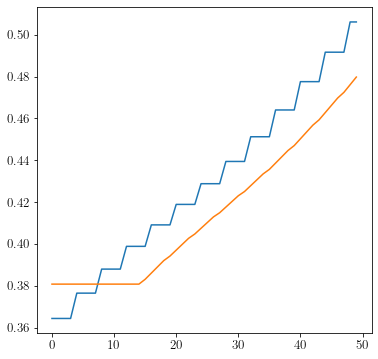

In [12]:
logs1 = logs.copy()

logs1['first remote'][0]['dronePositionFiltered.x'] = running_average(logs1['first remote'][0]['dronePosition.x'], 15)

plt.figure(figsize=(6,6))

plt.plot(logs1['first remote'][0]['dronePosition.x'][0:50])
plt.plot(logs1['first remote'][0]['dronePositionFiltered.x'][0:50])

# Collision Analysis

In [36]:
coll_df = pd.read_csv('/Volumes/GoogleDrive/My Drive/Matteo/EPFL/LIS/PhD/Bidirectional_wearable_interface/DATA/Haptics/Haptics_X/Bidir - haptics X collisions - Sheet1.csv')
coll_df

,Index,Run,Subject,Interface,Collided
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,96.0,1.0,10.0,Remote,1.0
96,97.0,2.0,10.0,Remote,0.0
97,98.0,3.0,10.0,Remote,1.0
98,99.0,4.0,10.0,Remote,0.0


In [37]:
coll = {}

coll['motion'] = coll_df[coll_df['Interface']=='Motion']
coll['remote'] = coll_df[coll_df['Interface']=='Remote']


coll['first motion'] = coll['motion'][coll['motion']['Run']==1]
coll['last motion'] = coll['motion'][coll['motion']['Run']==5]
coll['first remote'] = coll['remote'][coll['remote']['Run']==1]
coll['last remote'] = coll['remote'][coll['remote']['Run']==5]
# logs['last motion'] = [logs[x][-1] for x in sub_motion]
# logs['first remote'] = [logs[x][0] for x in sub_remote]
# logs['last remote'] = [logs[x][-1] for x in sub_remote]
print(coll['motion'])
print(coll['remote'])

    Index  Run  Subject Interface  Collided
10   11.0  1.0      2.0    Motion       0.0
11   12.0  2.0      2.0    Motion       0.0
12   13.0  3.0      2.0    Motion       0.0
13   14.0  4.0      2.0    Motion       0.0
14   15.0  5.0      2.0    Motion       0.0
20   21.0  1.0      3.0    Motion       0.0
21   22.0  2.0      3.0    Motion       0.0
22   23.0  3.0      3.0    Motion       0.0
23   24.0  4.0      3.0    Motion       0.0
24   25.0  5.0      3.0    Motion       0.0
30   31.0  1.0      4.0    Motion       0.0
31   32.0  2.0      4.0    Motion       0.0
32   33.0  3.0      4.0    Motion       0.0
33   34.0  4.0      4.0    Motion       1.0
34   35.0  5.0      4.0    Motion       0.0
40   41.0  1.0      5.0    Motion       0.0
41   42.0  2.0      5.0    Motion       1.0
42   43.0  3.0      5.0    Motion       0.0
43   44.0  4.0      5.0    Motion       0.0
44   45.0  5.0      5.0    Motion       0.0
50   51.0  1.0      6.0    Motion       0.0
51   52.0  2.0      6.0    Motio


consider all runs

mean motion =  0.4444444444444444
std motion =  0.4969039949999533
mean remote =  1.8888888888888888
std remote =  0.9938079899999066

total motion =  4.0
total remote =  17.0

p = 0.0023307281594675327 !!!!!!!!!!

consider first runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.5555555555555556
std remote =  0.4969039949999533

total motion =  0.0
total remote =  5.0

p = 0.010556660425736162 !!!!!!

consider last runs

mean motion =  0.0
std motion =  0.0
mean remote =  0.3333333333333333
std remote =  0.4714045207910317

total motion =  0.0
total remote =  3.0

p = 0.06519641907813 !


Text(0.5, 1.0, 'Collisions - last run')

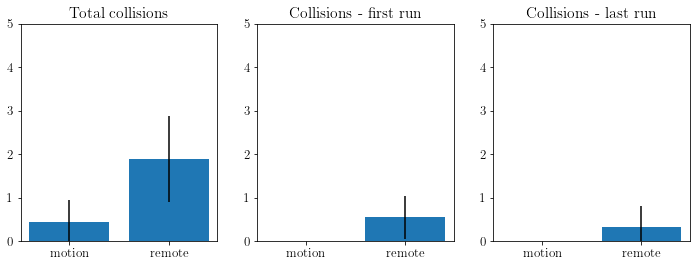

In [38]:
def compute_mean_std_collisions(data_m, data_r):
    
    coll_per_sub_m = []
    
    for sub in np.unique(data_m['Subject']):
        sub_coll = data_m[data_m['Subject']==sub]
        
        coll_per_sub_m.append(sub_coll['Collided'].sum())
        
    coll_per_sub_r = []
    
    for sub in np.unique(data_r['Subject']):
        sub_coll = data_r[data_r['Subject']==sub]
        
        coll_per_sub_r.append(sub_coll['Collided'].sum())
    
    mean_m = np.mean(coll_per_sub_m)
    std_m = np.std(coll_per_sub_m)
    mean_r = np.mean(coll_per_sub_r)
    std_r = np.std(coll_per_sub_r)

    print('mean motion = ', mean_m)
    print('std motion = ', std_m)
    print('mean remote = ', mean_r)
    print('std remote = ', std_r)
    print('')
    print('total motion = ', np.sum(coll_per_sub_m))
    print('total remote = ', np.sum(coll_per_sub_r))
    print('')

    t, p = t_test_kruskal(coll_per_sub_m, coll_per_sub_r)

    print_p(p)
    
    return [coll_per_sub_m, coll_per_sub_r]

print('')
print('consider all runs')
print('')
all_m, all_r = compute_mean_std_collisions(coll['motion'], coll['remote'])
    
print('')
print('consider first runs')
print('')
first_m, first_r = compute_mean_std_collisions(coll['first motion'], coll['first remote'])
    
print('')
print('consider last runs')
print('')
last_m, last_r = compute_mean_std_collisions(coll['last motion'], coll['last remote'])


    
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)
ax.bar([0, 1],
   [np.mean(all_m), np.mean(all_r)],
      yerr = [np.std(all_m), np.std(all_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')

ax = fig.add_subplot(132)
ax.bar([0, 1],
   [np.mean(first_m), np.mean(first_r)],
      yerr = [np.std(first_m), np.std(first_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Collisions - first run')

ax = fig.add_subplot(133)
ax.bar([0, 1],
   [np.mean(last_m), np.mean(last_r)],
      yerr = [np.std(last_m), np.std(last_r)])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 5])
plt.title('Total collisions')
plt.title('Collisions - last run')

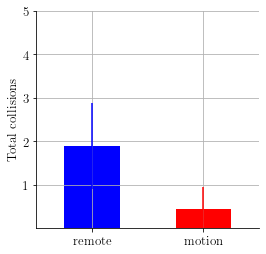

In [50]:

c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(all_r),],
      yerr = [np.std(all_r)], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(all_m)],
      yerr = [np.std(all_m)], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([1,2,3,4,5])
plt.ylim([0, 5])
plt.xlim([0.5, 2.5])
plt.ylabel('Total collisions')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('collisions_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>

# Approach wall Analysis

In [40]:
def comp_max_dist(df):
    
    return np.max(df['dronePosition.x'])

In [41]:
x_max = runHapticsAnalysis(comp_max_dist)

motion
[2.166543960571289, 2.3427584171295166, 2.3182642459869385, 2.6193010807037354, 2.1527178287506104, 2.203144073486328, 2.172031879425049, 2.367964267730713, 2.2921621799468994, 2.2938807010650635, 2.0830440521240234, 2.3672471046447754, 2.1614696979522705, 2.3489859104156494, 2.1100220680236816, 1.7940592765808105, 2.562236785888672, 2.2595462799072266, 2.438251256942749, 2.281041145324707, 2.32242751121521, 2.406738758087158, 2.179379463195801, 2.3031210899353027, 2.222109794616699, 2.102964162826538, 2.135408878326416, 2.1898622512817383, 2.2468628883361816, 2.1908209323883057, 2.2549567222595215, 2.3733744621276855, 2.2341959476470947, 2.368077039718628, 2.223067283630371, 2.2383840084075928, 2.3013014793395996, 2.1632609367370605, 2.2235822677612305, 2.2708401679992676, 2.336261749267578, 2.345310688018799, 2.409379482269287, 2.3194692134857178, 2.3210558891296387]
mean =  2.267041895124647
std =  0.131088157209038

remote
[2.5452990531921387, 2.35636305809021, 2.44672036170

In [42]:
dist_obstacle = 2.5
collider = 0.07

x_collision = dist_obstacle - collider


motion remote
p = 0.013680226226984397 !!!!!!


Text(0.5, 1.0, 'Distances')

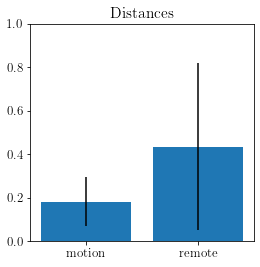

In [43]:
distances = {}

for i in interfaces:
    distances[i] = x_collision - np.array(x_max[i])
    distances[i] = distances[i][np.where(distances[i]>0)]
    
print()
            
for idx,i in enumerate(interfaces):
    for j in interfaces[idx+1:]:
        if i != j:

            t, p = t_test_kruskal(distances[i],distances[j])

            print (i,j)
            print_p(p)
        
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.bar([0, 1],
   [np.mean(distances['motion']), np.mean(distances['remote'])],
      yerr = [np.std(distances['motion']), np.std(distances['remote'])])

plt.xticks(range(2), ['motion', 'remote'])
plt.ylim([0, 1])
plt.title('Distances')

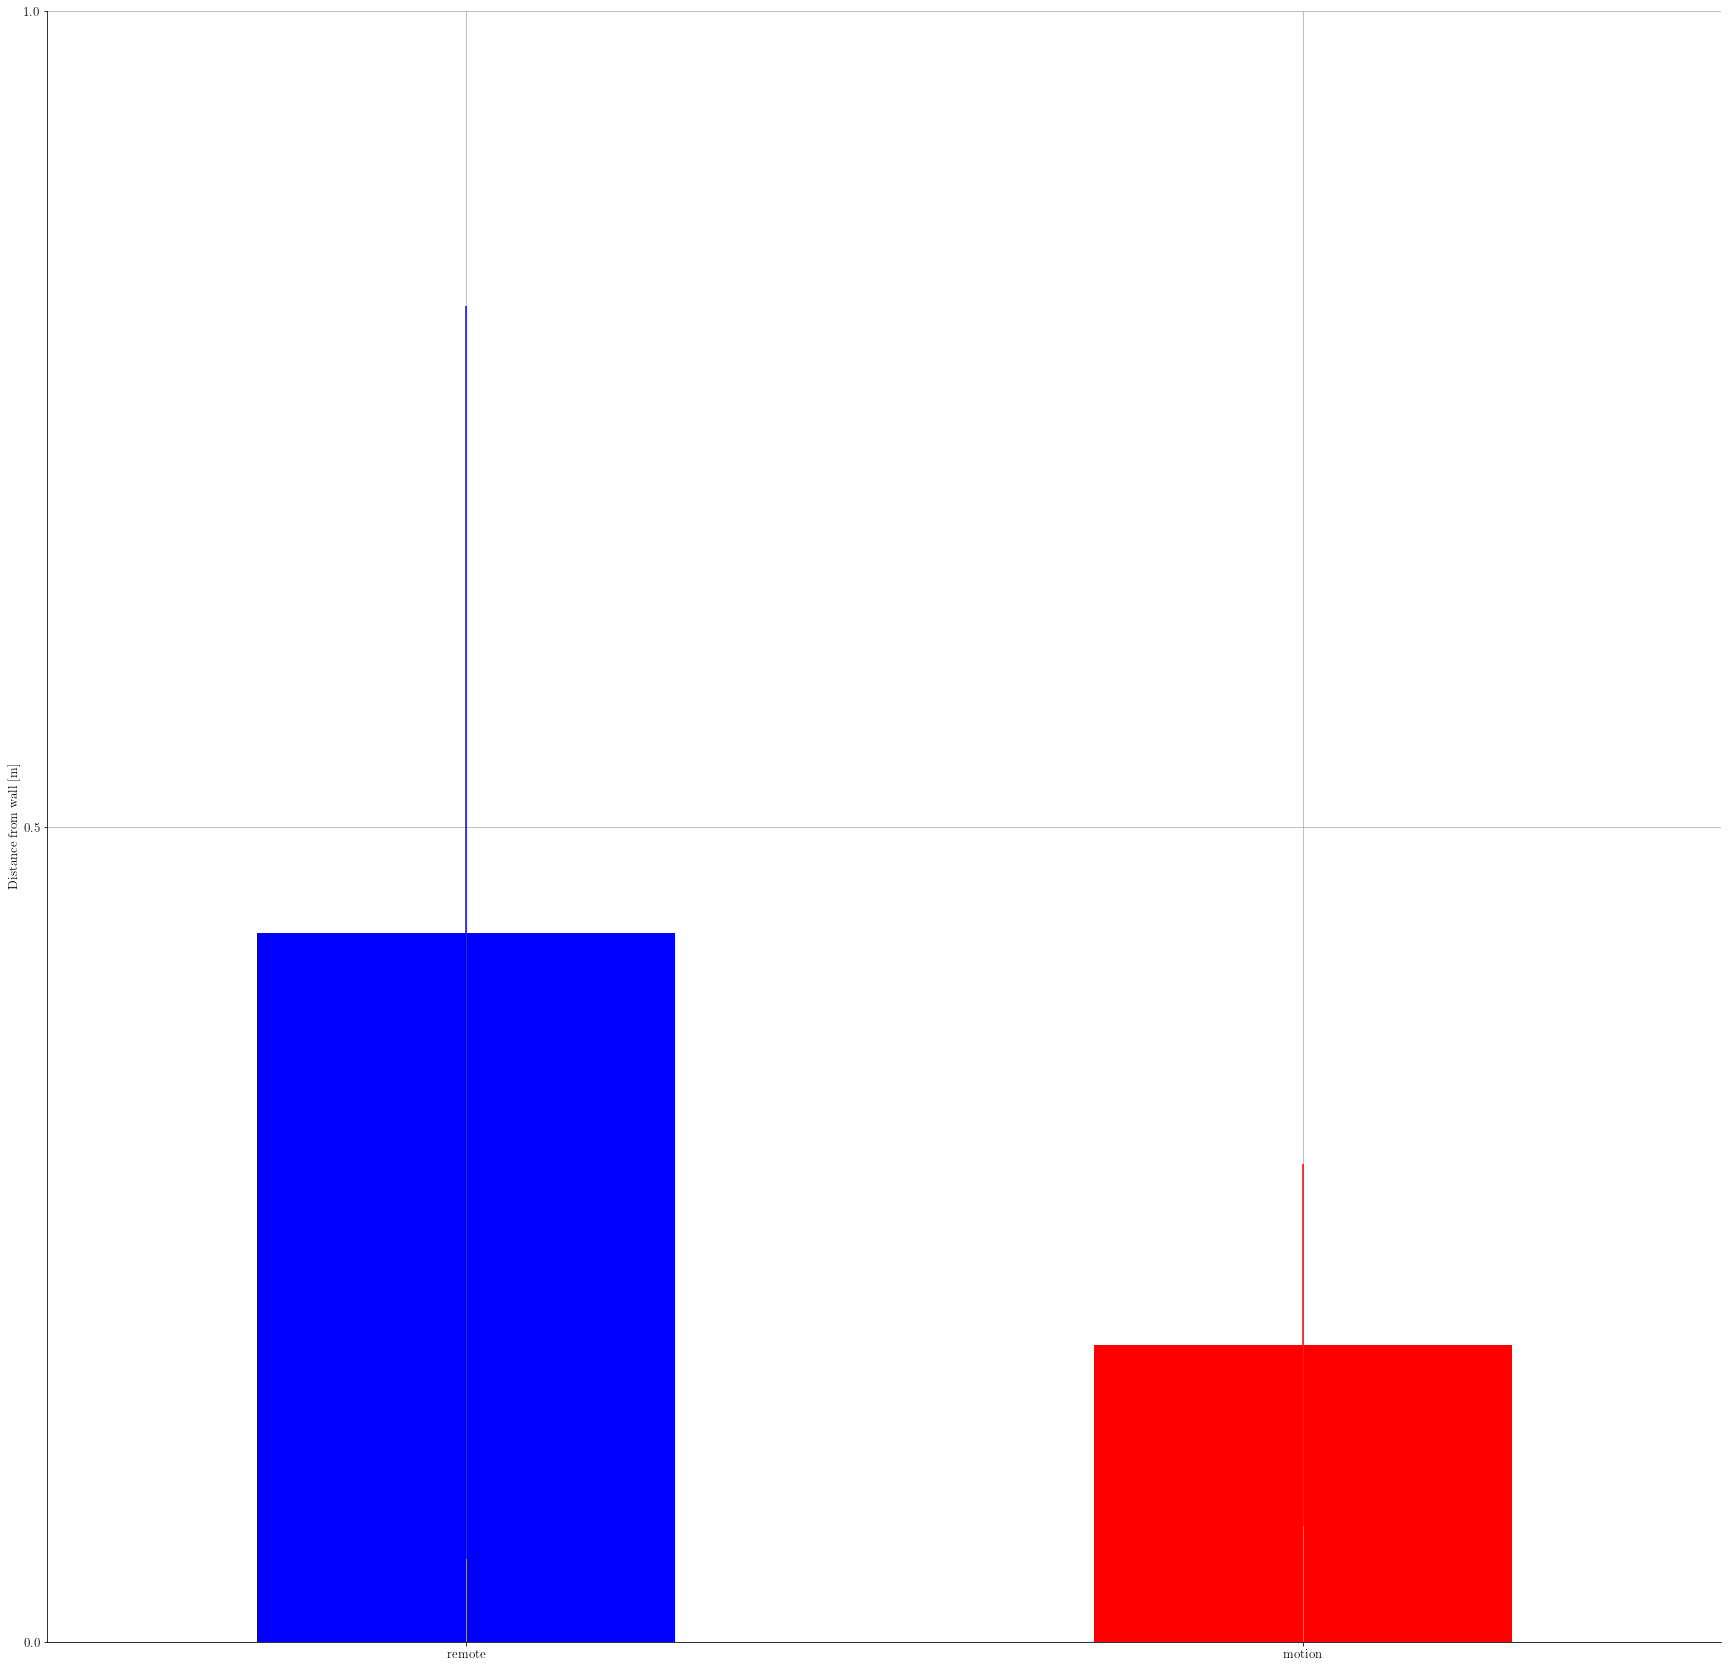

In [44]:
c1 = 'b'
c2 = 'r'

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar([1],
   [np.mean(distances['remote']),],
      yerr = [np.std(distances['remote'])], color =c1, ecolor = c1, width=0.5 )
ax.bar([2],
   [np.mean(distances['motion'])],
      yerr = [np.std(distances['motion'])], color =c2, ecolor = c2, width=0.5 )

plt.xticks([1,2], ['remote', 'motion'])
plt.yticks([0,0.5,1])
plt.ylim([0, 1])
plt.xlim([0.5, 2.5])
plt.ylabel('Distance from wall [m]')
plt.grid()
        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

savefig('distances_X.pdf', bbox_inches='tight')

## <span style="color:red">HERE RESULTS</span>